# NREL - Offshore WA OR - turbine 

## Predicción: h = 1 / H = 24

# K-nearest_regressor

**Parámetros:**

In [22]:
%matplotlib inline
import os
import sys
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# import RenewAI
sys.path.append('/Users/tmorales/tmp/RNN-windPower/src')
from pre_process.split_ml_ts import dataframe_split

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.externals import joblib
from sklearn.metrics.regression import mean_squared_error
from sklearn.metrics.regression import mean_absolute_error

In [29]:
exp_path = '/Users/tmorales/tmp/experiments/NREL/Offshore_WA_OR/turbine_25915'
experiment_name = 'K-nearest-regressor'
directory = os.path.join(exp_path, experiment_name)
if not os.path.exists(directory):
    os.makedirs(directory)

## Load file

In [3]:
path = '/Users/tmorales/tmp/RNN-windPower/database/wind_farms/Offshore_WA_OR/Offshore_WA_OR_features'

In [4]:
os.chdir(path)
files = [file for file in glob.glob('Offshore_WA_OR_features_*.csv')]
files

['Offshore_WA_OR_features_h_01.csv',
 'Offshore_WA_OR_features_h_02.csv',
 'Offshore_WA_OR_features_h_03.csv',
 'Offshore_WA_OR_features_h_04.csv',
 'Offshore_WA_OR_features_h_05.csv',
 'Offshore_WA_OR_features_h_06.csv',
 'Offshore_WA_OR_features_h_07.csv',
 'Offshore_WA_OR_features_h_08.csv',
 'Offshore_WA_OR_features_h_09.csv',
 'Offshore_WA_OR_features_h_10.csv',
 'Offshore_WA_OR_features_h_11.csv',
 'Offshore_WA_OR_features_h_12.csv',
 'Offshore_WA_OR_features_h_13.csv',
 'Offshore_WA_OR_features_h_14.csv',
 'Offshore_WA_OR_features_h_15.csv',
 'Offshore_WA_OR_features_h_16.csv',
 'Offshore_WA_OR_features_h_17.csv',
 'Offshore_WA_OR_features_h_18.csv',
 'Offshore_WA_OR_features_h_19.csv',
 'Offshore_WA_OR_features_h_20.csv',
 'Offshore_WA_OR_features_h_21.csv',
 'Offshore_WA_OR_features_h_22.csv',
 'Offshore_WA_OR_features_h_23.csv',
 'Offshore_WA_OR_features_h_24.csv']

##  Paso 1: only one h-step

In [5]:
h1 = files[0]

In [6]:
# create directory for each horizont (each horizon is a regressor)
horizont = 1
directory_by_horizont = os.path.join(exp_path, 
                                     'K-nearest-regressor',
                                     'model_saved_h={0:03d}'.format(horizont))
if not os.path.exists(directory_by_horizont):
    os.makedirs(directory_by_horizont)

In [7]:
# load file
df_h1 = pd.read_csv(files[0], delimiter=';', index_col=0)
df_h1.head(4)

,f_0,f_1,f_2,f_3,f_4,f_5,target_h1
target_date,,,,,,,
2004-01-01 06:00:00,6.96,5.28,5.32,4.93,4.05,3.95,4.19
2004-01-01 07:00:00,5.28,5.32,4.93,4.05,3.95,4.19,4.89
2004-01-01 08:00:00,5.32,4.93,4.05,3.95,4.19,4.89,5.16
2004-01-01 09:00:00,4.93,4.05,3.95,4.19,4.89,5.16,5.01


In [20]:
# select the best model for h=1

# split the dataset in train, val and test
data = dataframe_split(df_h1)
train_set = data['train_set']
validation_set = data['validation_set']
test_set = data['test_set']


# features and target columns
features_columns = train_set.columns[1:-1]
target_column = train_set.columns[-1:]

# select the values of features and target columns.
features_train_set = train_set[features_columns]
target_train_set = train_set[target_column]
features_validation_set = validation_set[features_columns]
target_validation_set = validation_set[target_column]
features_test_set = test_set[features_columns]
target_test_set = test_set[target_column]

In [9]:
print('features columns: {0}'.format(features_columns))
print('target column: {0}'.format(target_column))

features columns: Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5'], dtype='object')
target column: Index(['target_h1'], dtype='object')


In [10]:
features_train_set.head()

,f_1,f_2,f_3,f_4,f_5
target_date,,,,,
2004-10-06 02:00:00,6.89,6.14,6.99,7.34,4.78
2004-10-15 11:00:00,9.24,8.03,7.28,8.14,8.12
2006-04-18 12:00:00,3.02,3.46,3.93,4.08,4.47
2005-01-15 20:00:00,8.29,7.76,7.49,7.80,8.12
2005-11-14 21:00:00,5.98,5.64,5.70,5.18,4.59


In [11]:
features_train_set.values

array([[6.89, 6.14, 6.99, 7.34, 4.78],
       [9.24, 8.03, 7.28, 8.14, 8.12],
       [3.02, 3.46, 3.93, 4.08, 4.47],
       ...,
       [4.54, 4.09, 4.36, 4.61, 4.39],
       [6.75, 8.21, 7.61, 7.05, 6.45],
       [2.09, 4.71, 5.32, 2.78, 1.76]])

In [12]:
target_train_set.head()

,target_h1
target_date,
2004-10-06 02:00:00,3.99
2004-10-15 11:00:00,7.57
2006-04-18 12:00:00,4.24
2005-01-15 20:00:00,7.95
2005-11-14 21:00:00,4.58


In [13]:
target_train_set.values

array([[3.99],
       [7.57],
       [4.24],
       ...,
       [5.36],
       [5.82],
       [2.06]])

In [14]:
features_validation_set.head()

,f_1,f_2,f_3,f_4,f_5
target_date,,,,,
2005-03-16 21:00:00,12.88,10.07,9.67,8.19,8.20
2006-05-01 19:00:00,8.70,8.80,8.69,8.31,8.95
2006-02-22 01:00:00,2.30,1.78,1.36,1.76,2.40
2004-06-11 21:00:00,2.46,1.93,3.39,3.61,4.47
2004-06-22 17:00:00,1.15,1.19,1.50,1.01,1.68


In [15]:
target_validation_set.head()

,target_h1
target_date,
2005-03-16 21:00:00,8.71
2006-05-01 19:00:00,9.26
2006-02-22 01:00:00,2.22
2004-06-11 21:00:00,4.56
2004-06-22 17:00:00,2.21


In [16]:
x_train = features_train_set.values; y_train = target_train_set.values
x_val = features_validation_set.values; y_val = target_validation_set.values

In [17]:
# select the best model
n_neighbors = 40
weights='uniform'

history = {} # dictionary with all metrics
mse = [] ; val_mse = [] # mean squared error
number_neighbors = range(2, n_neighbors, 2)
for n_neighbors in number_neighbors:
    print('*** N neighbors: {0}'.format(n_neighbors))
    # - model parameters
    knr = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)
    # - fit the data 
    knr = knr.fit(x_train, y_train)
    # - save del model
    path_model_saved = os.path.join(directory_by_horizont, 
                                    'K-nearest_regressor_{0:03d}_{1}'.format(n_neighbors,
                                                                                 weights))
    joblib.dump(knr, path_model_saved)
    # - overfitting: evaluate train and validation set on the fitted model. 
    y_train_eval = knr.predict(x_train)
    y_val_eval = knr.predict(x_val)
    # - metric calculation
    mse_train = mean_squared_error(y_train, y_train_eval)
    mse_validation = mean_absolute_error(y_val, y_val_eval)
    # for each k-neighbors confoguration save the metrics inside a list 
    mse.append(mse_train); val_mse.append(mse_validation)

history['mse'] = mse
history['val_mse'] = val_mse

*** N neighbors: 2
*** N neighbors: 4
*** N neighbors: 6
*** N neighbors: 8
*** N neighbors: 10
*** N neighbors: 12
*** N neighbors: 14
*** N neighbors: 16
*** N neighbors: 18
*** N neighbors: 20
*** N neighbors: 22
*** N neighbors: 24
*** N neighbors: 26
*** N neighbors: 28
*** N neighbors: 30
*** N neighbors: 32
*** N neighbors: 34
*** N neighbors: 36
*** N neighbors: 38


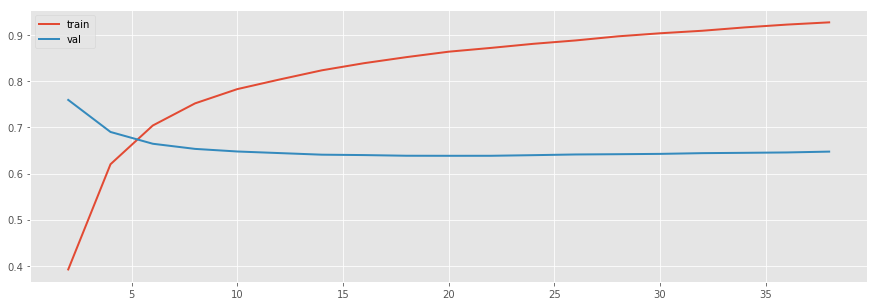

In [18]:
f = plt.figure(figsize=(15, 5))
plt.plot(number_neighbors, history['mse'], lw=2, label='train')
plt.plot(number_neighbors, history['val_mse'], lw=2, label='val')
plt.legend()

## Paso 3: Prediction

In [23]:
x_test = features_test_set.values.astype('float32')
x_test_lstm = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test_lstm.shape

(5260, 5, 1)

In [24]:
best_model = os.path.join(directory_by_horizont, 'K-nearest_regressor_006_uniform')
model = joblib.load(best_model)
model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=6, p=2,
          weights='uniform')

In [25]:
predicted = model.predict(x_test)

In [26]:
df_prediction = test_set.copy()
df_prediction.head()

,f_0,f_1,f_2,f_3,f_4,f_5,target_h1
target_date,,,,,,,
2006-05-26 20:00:00,5.30,5.19,5.24,5.27,4.45,3.92,4.19
2006-05-26 21:00:00,5.19,5.24,5.27,4.45,3.92,4.19,4.60
2006-05-26 22:00:00,5.24,5.27,4.45,3.92,4.19,4.60,5.34
2006-05-26 23:00:00,5.27,4.45,3.92,4.19,4.60,5.34,4.70
2006-05-27 00:00:00,4.45,3.92,4.19,4.60,5.34,4.70,3.00


In [27]:
df_prediction['target_predicted'] = predicted
df_prediction.head()

,f_0,f_1,f_2,f_3,f_4,f_5,target_h1,target_predicted
target_date,,,,,,,,
2006-05-26 20:00:00,5.30,5.19,5.24,5.27,4.45,3.92,4.19,3.760000
2006-05-26 21:00:00,5.19,5.24,5.27,4.45,3.92,4.19,4.60,4.368333
2006-05-26 22:00:00,5.24,5.27,4.45,3.92,4.19,4.60,5.34,4.555000
2006-05-26 23:00:00,5.27,4.45,3.92,4.19,4.60,5.34,4.70,5.705000
2006-05-27 00:00:00,4.45,3.92,4.19,4.60,5.34,4.70,3.00,5.013333


In [30]:
# save test dataframe (df_prediction)
filename =  os.path.join(directory_by_horizont, experiment_name)
df_prediction.to_csv('{0}.csv'.format(filename))

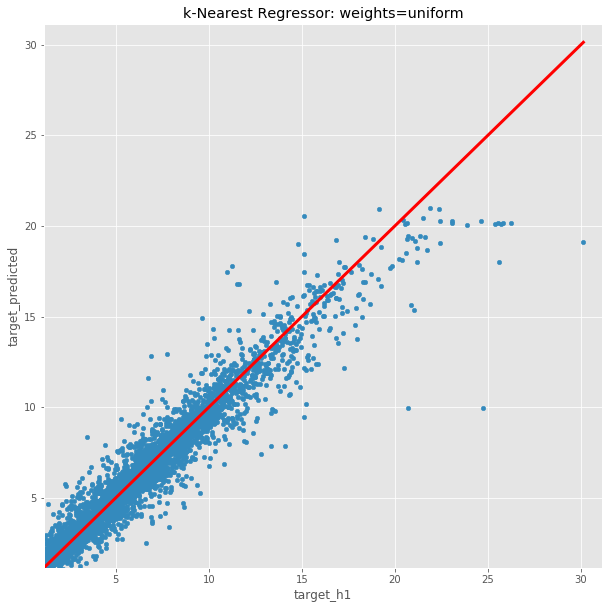

In [31]:
#title='LSTM-10-unit_hidden-5'
title='k-Nearest Regressor: weights=uniform'

f, ax = plt.subplots(1,1,figsize=(10,10))
x_min = df_prediction.target_h1.min() 
x_max = df_prediction.target_h1.max()
y_min = df_prediction.target_predicted.min()
y_max = df_prediction.target_predicted.max()
ax.set_title(title)
# line
ax.set_xlim(x_min+1, x_max+1)
ax.set_ylim(x_min+1, x_max+1)
ax.plot((x_min, x_max), (x_min, x_max), lw=3, c='r')
# scatter
df_prediction.plot(ax=ax,
                   x='target_h1',
                   y='target_predicted',
                   kind='scatter',
                  )

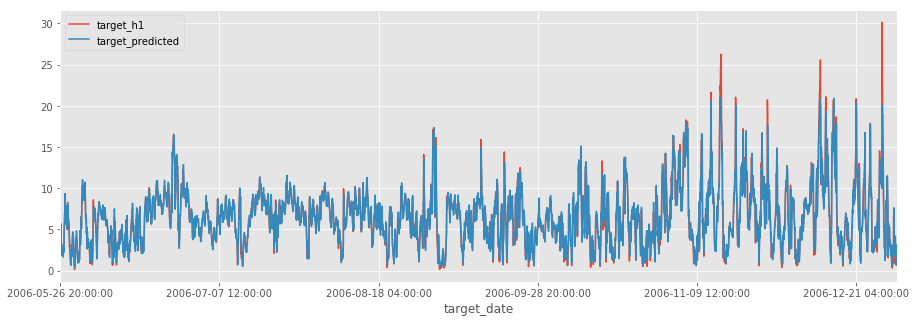

In [33]:
df_prediction.iloc[:,-2:].plot(figsize=(15,5))

In [34]:
df_prediction.head()

,f_0,f_1,f_2,f_3,f_4,f_5,target_h1,target_predicted
target_date,,,,,,,,
2006-05-26 20:00:00,5.30,5.19,5.24,5.27,4.45,3.92,4.19,3.760000
2006-05-26 21:00:00,5.19,5.24,5.27,4.45,3.92,4.19,4.60,4.368333
2006-05-26 22:00:00,5.24,5.27,4.45,3.92,4.19,4.60,5.34,4.555000
2006-05-26 23:00:00,5.27,4.45,3.92,4.19,4.60,5.34,4.70,5.705000
2006-05-27 00:00:00,4.45,3.92,4.19,4.60,5.34,4.70,3.00,5.013333


In [35]:
df_prediction['mse_h1'] = np.power(df_prediction.target_h1 -
                                   df_prediction.target_predicted, 2)

In [36]:
df_prediction['mae_h1'] = np.abs(df_prediction.target_h1 - 
                                 df_prediction.target_predicted)

In [37]:
# write on disk
df_prediction.head()

,f_0,f_1,f_2,f_3,f_4,f_5,target_h1,target_predicted,mse_h1,mae_h1
target_date,,,,,,,,,,
2006-05-26 20:00:00,5.30,5.19,5.24,5.27,4.45,3.92,4.19,3.760000,0.184900,0.430000
2006-05-26 21:00:00,5.19,5.24,5.27,4.45,3.92,4.19,4.60,4.368333,0.053669,0.231667
2006-05-26 22:00:00,5.24,5.27,4.45,3.92,4.19,4.60,5.34,4.555000,0.616225,0.785000
2006-05-26 23:00:00,5.27,4.45,3.92,4.19,4.60,5.34,4.70,5.705000,1.010025,1.005000
2006-05-27 00:00:00,4.45,3.92,4.19,4.60,5.34,4.70,3.00,5.013333,4.053511,2.013333


In [38]:
test_mse = df_prediction.mse_h1.sum() / len(df_prediction.mse_h1)
test_mse

0.9601426832488383

In [39]:
test_mae = df_prediction.mae_h1.sum() / len(df_prediction.mae_h1)
test_mae

0.6138437896070975

## K- Nearest -- operitivización

In [20]:
# features and target columns
features_columns = train_set.columns[1:-1]
target_column = train_set.columns[-1:]

# select the values of features and target columns.
features_train_set = train_set[features_columns]
target_train_set = train_set[target_column]
features_validation_set = validation_set[features_columns]
target_validation_set = validation_set[target_column]

In [21]:
def plot_fitting(history, path, horizont=None, title='ml-model'):
    f = plt.figure(figsize=(15,5))
    number_neighbors = range(len(history['mse']))
    plt.plot(number_neighbors, history['mse'], lw=2, label='train')
    plt.plot(number_neighbors, history['val_mse'], lw=2, label='validation')
    plt.title(title)
    plt.ylabel('MSE')
    plt.xlabel('Neighbor')
    plt.grid()
    plt.legend()
    
    plot_directory = os.path.join(path, 'plot_fit')
    if not os.path.exists(plot_directory):
        os.makedirs(plot_directory)
    plt.savefig(os.path.join(plot_directory, 'K-nearest_fit_h{0:02d}.png'.format(horizont)));
    print('plot saved in.....')

In [22]:
def select_best_model(train_set, validation_set, horizont=1,
                      n_neighbors=70, weights='uniform',
                      exp_path=os.getcwd()):
    # features and target columns
    features_columns = train_set.columns[1:-1]
    target_column = train_set.columns[-1:]

    # select the values of features and target columns.
    features_train_set = train_set[features_columns]
    target_train_set = train_set[target_column]
    features_validation_set = validation_set[features_columns]
    target_validation_set = validation_set[target_column]
    
    # select the best model
    history = {} # dictionary with all metrics
    mse = [] ; val_mse = [] # mean squared error
    number_neighbors = range(2, n_neighbors, 2)
    for n_neighbors in number_neighbors:
        print('*** N neighbors: {0}'.format(n_neighbors))
        knr = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)
        knr = knr.fit(features_train_set, target_train_set)
        path_model_saved = os.path.join(exp_path, 
                                        'K-nearest_regressor_{0:03d}_{1}'.format(n_neighbors,
                                                                                 weights))
        joblib.dump(knr, path_model_saved)
        # overfitting: evaluate train and validation set on the fitted model. 
        evaluate_train = knr.predict(features_train_set)
        evaluate_validation = knr.predict(features_validation_set)
        # metric calculation
        mse_train = mean_squared_error(target_train_set.values, 
                                       evaluate_train)
        mse_validation = mean_absolute_error(target_validation_set.values,
                                             evaluate_validation)
        mse.append(mse_train); val_mse.append(mse_validation)
        #mean_squared_error()
        #mean_absolute_error()
    
    history['mse'] = mse
    history['val_mse'] = val_mse
    
    return history

In [23]:
def write_ml_history(history, filename='ml-history'):
    df = pd.DataFrame({history}, index='')
    df.to_csv('{0}.csv'.format(filename))

In [24]:
for i, file in enumerate(files):
    horizont = i+1
    n_neighbors = 70
    weights = 'distance'
    print('Horizonte: {0}'.format(horizont))
    print('N neighbors: {0}'.format(n_neighbors))
    # create directory for each horizont (each horizon is a regressor)
    directory_by_horizont = os.path.join(exp_path, 
                                         'K-nearest-regressor',
                                         'model_saved_h={0:03d}'.format(horizont))
    if not os.path.exists(directory_by_horizont):
        os.makedirs(directory_by_horizont)
    # load file
    df = pd.read_csv(file, delimiter=';', index_col=0)
    # split dataset
    data = dataframe_split(h1)
    train_set = data['train_set']
    val_set = data['validation_set']
    test_set = data['test_set']
    # select the best model
    history = select_best_model(train_set, val_set, n_neighbors=n_neighbors, horizont=horizont, 
                                exp_path=directory_by_horizont)
    # plot the histories
    title_string = 'k-nearest h = {0}\nn-neighbors = {1}; weights = {2}'
    plot_path = os.path.join(exp_path, 'K-nearest-regressor')
    plot_fitting(history, plot_path, horizont=horizont, title=title_string)
    # write history
    df_history = pd.DataFrame(history)
    print(df_history.shape[0])
        
    

Horizonte: 1
N neighbors: 70


AttributeError: 'str' object has no attribute 'shape'

'/Users/tmorales/tmp/experiments/NREL/Offshore_WA_OR/turbine_25915'